# Importando bibliotecas

In [545]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#modelling data
from sklearn.tree import export_graphviz
import graphviz
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree


## Dataset

In [509]:
#importing the csv archive


df = pd.read_csv("high_diamond_ranked_10min.csv")
df.head()
df.info

<bound method DataFrame.info of           gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1    

## Analisando e limpando o Dataset

<h1>Normalizando o dataset

In [510]:
df['blueWins'][0]

0

In [511]:

linha = 0
for key in df: 
  for value in df[key]:
    if value > 5 or value < -5:
      num = value
      n=0
      while num >= 5 or num <= -5:
        num = num/10 
        n+=1  
      value = value/10**n
      df[key][linha] = value 
      linha += 1
  linha = 0 
  
df.info
            

C:\Users\joaov\AppData\Local\Temp\ipykernel_7640\2298759586.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key][linha] = value


<bound method DataFrame.info of         gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0     4.519158         0             2.80                 0.7               1   
1     4.523372         0             1.20                 0.6               0   
2     4.521475         0             1.50                 0.6               0   
3     4.524384         0             4.30                 1.3               0   
4     4.436034         0             0.75                 0.6               0   
...        ...       ...              ...                 ...             ...   
9874  4.527873         1             2.30                 2.0               1   
9875  4.527797         1             1.40                 0.0               0   
9876  4.527714         0             1.80                 1.0               0   
9877  4.527628         0            14.00                 4.0               1   
9878  4.523773         1            18.00                 0.0               1

### Separando dados do *blue side* e do *red side*

In [512]:
#funcao p/ separar dados do red_side e do blue_side
def splitting_sides(side, side_data):
    for col in df:
        if side in col:
            side_data.append(col)
    
    return side_data

### *Blue Side*

In [513]:
blue_side = []
blue_side = splitting_sides("blue", blue_side)

blue_data = df[blue_side]

blue_data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,2.80,0.7,1,0.9,0.6,1.1,0,0,0,0,1.7210,0.66,1.7039,1.95,3.60,0.643,-0.800,1.95,1.7210
1,0,1.20,0.6,0,0.7,1.1,0.6,0,0,0,0,1.4712,0.66,1.6265,1.74,4.30,-2.908,-1.173,1.74,1.4712
2,0,1.50,0.6,0,0.6,0.6,0.6,1,1,0,0,1.6113,0.64,1.6221,1.86,4.60,-1.172,-1.033,1.86,1.6113
3,0,4.30,1.3,0,0.7,0.6,0.7,1,0,1,0,1.5157,0.70,1.7954,2.01,0.55,-1.321,-0.700,2.01,1.5157
4,0,0.75,0.6,0,0.7,1.3,0.8,0,0,0,0,1.6400,0.70,1.8543,2.10,0.57,-1.004,2.300,2.10,1.6400


### *Red Side* 

In [514]:
red_side = []
red_side = splitting_sides("red", red_side)

red_data = df[red_side]

red_data.head()

,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,1.5,0.6,0,0.6,0.9,0.8,0,0,0,0,1.6567,0.68,1.7047,1.97,0.55,-0.643,0.800,1.97,1.6567
1,1.2,1.4,1,1.1,0.7,1.4,2,1,1,1,1.7620,0.68,1.7438,2.40,0.52,2.908,1.173,2.40,1.7620
2,1.5,0.6,1,0.6,0.6,1.0,0,0,0,0,1.7285,0.68,1.7254,2.03,2.80,1.172,1.033,2.03,1.7285
3,1.5,0.7,1,0.6,0.7,0.7,0,0,0,0,1.6478,0.70,1.7961,2.35,4.70,1.321,0.700,2.35,1.6478
4,1.7,0.7,1,1.3,0.7,0.9,1,1,0,0,1.7404,0.70,1.8313,2.25,0.67,1.004,-2.300,2.25,1.7404


In [515]:
#adding a redWins column 

red_data["redWins"] = df["blueWins"].map({1:0, 0:1})
red_data.head() 

C:\Users\joaov\AppData\Local\Temp\ipykernel_7640\1815178656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_data["redWins"] = df["blueWins"].map({1:0, 0:1})


,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,redWins
0,1.5,0.6,0,0.6,0.9,0.8,0,0,0,0,1.6567,0.68,1.7047,1.97,0.55,-0.643,0.800,1.97,1.6567,1
1,1.2,1.4,1,1.1,0.7,1.4,2,1,1,1,1.7620,0.68,1.7438,2.40,0.52,2.908,1.173,2.40,1.7620,1
2,1.5,0.6,1,0.6,0.6,1.0,0,0,0,0,1.7285,0.68,1.7254,2.03,2.80,1.172,1.033,2.03,1.7285,1
3,1.5,0.7,1,0.6,0.7,0.7,0,0,0,0,1.6478,0.70,1.7961,2.35,4.70,1.321,0.700,2.35,1.6478,1
4,1.7,0.7,1,1.3,0.7,0.9,1,1,0,0,1.7404,0.70,1.8313,2.25,0.67,1.004,-2.300,2.25,1.7404,1


# Separando dados de teste e treinamento

In [516]:
#para o time vermelho
X = red_data.drop('redWins', axis=1).values

y = red_data['redWins'].values
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size=0.30)


In [517]:
#para o time azul
X = blue_data.drop('blueWins', axis=1).values

y = blue_data['blueWins'].values
X_train_blue, X_test_blue, y_train_blue, y_test_blue = train_test_split(X, y, test_size=0.30)

# Modelando os dados usando *Random Forest* 


In [518]:
#Treinando vermelho
rdf = RandomForestClassifier(n_estimators=40, max_depth= 10)
rdf.fit(X_train_red, y_train_red)

RandomForestClassifier(max_depth=10, n_estimators=40)

In [519]:
#treinando azul
rdf = RandomForestClassifier(n_estimators=300, max_depth= 30)
rdf.fit(X_train_blue, y_train_blue)

RandomForestClassifier(max_depth=30, n_estimators=300)

## Testanto o modelo

In [520]:
#testanto Vermelho
y_pred = rdf.predict(X_test_red)

accuracy = accuracy_score(y_test_red, y_pred)
precision = precision_score(y_test_red, y_pred)
recall = recall_score(y_test_red, y_pred)

print("Accuracy:", "{:.5f}".format(accuracy))
print("Precision:", "{:.5f}".format(precision))
print("Recall:", "{:.5f}".format(recall))

Accuracy: 0.68016
Precision: 0.67569
Recall: 0.68030


In [521]:
#testando azul
y_pred = rdf.predict(X_test_blue)

accuracy = accuracy_score(y_test_blue, y_pred)
precision = precision_score(y_test_blue, y_pred)
recall = recall_score(y_test_blue, y_pred)

print("Accuracy:", "{:.5f}".format(accuracy))
print("Precision:", "{:.5f}".format(precision))
print("Recall:", "{:.5f}".format(recall))

Accuracy: 0.70580
Precision: 0.71398
Recall: 0.68203


## Treinando com o database completo

### Separando conjunto de teste e treinamento


In [539]:
X = df.drop('blueWins', axis=1)
y = df['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

### Treinando o modelo


In [540]:
rdf = RandomForestClassifier(n_estimators=50)
rdf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

<H2> Testando o modelo

In [542]:
y_pred = rdf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", "{:0.5f}".format(accuracy))
print("Precision:", "{:0.5f}".format(precision))
print("Recall:", "{:0.5f}".format(recall))

Accuracy: 0.72672
Precision: 0.73264
Recall: 0.71486


### Plotando uma *Random Forest*

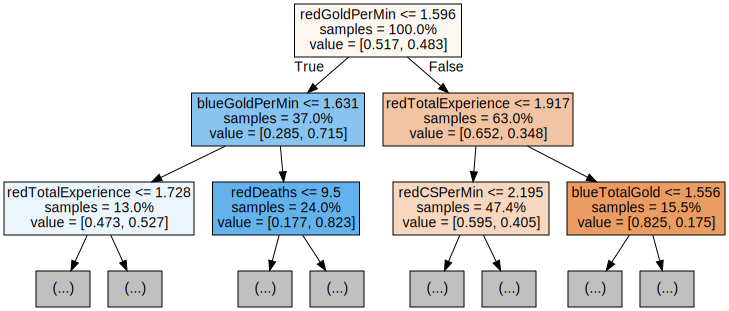

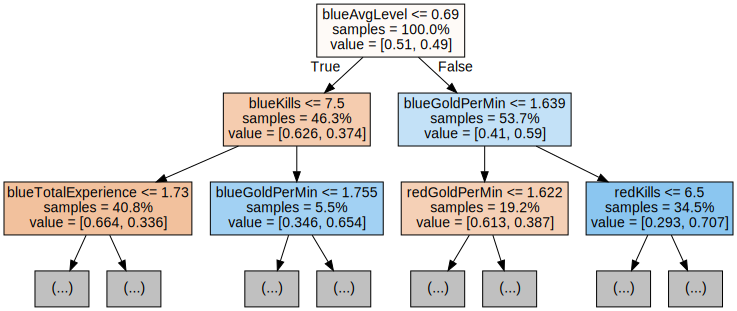

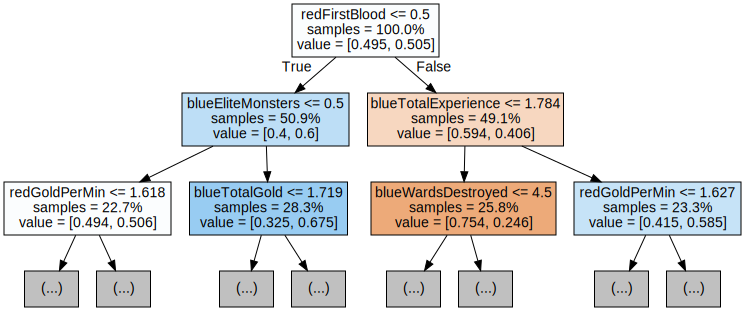

In [546]:
#plotting the random tree

for i in range(3):
    tree = rdf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Análise dos K Neighbors (previsão de vitória do *blue side*)

Dentro do League of Legends, um importante fator que leva a vitória de uma equipe é o KDA médio de uma equipe. O KDA consite na quantidade de *Kills*, *Deaths* e *Assist* de uma equipe. Além disso, a quantidade de ouro total resgatada pelos jogadores também é um fator importante, pois o dinheiro adquirido durante uma partida será utilizado na compra de itens para deixar a sua equipe mais fortalecida. 

In [ ]:
X = blue_data.loc[:, ['blueKills', 'blueDeaths','blueAssists', 
                      'blueGoldDiff', 'blueEliteMonsters']].values #independent variables considering the KDA and total gold

y = blue_data.iloc[:, 0].values #dependent variables aka blueWins datas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

print(y_test)
print(y_pred)

[1 1 0 ... 0 0 1]
[1 1 0 ... 0 0 1]


In [ ]:
conf = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(conf)
print("Accuracy:", "{:0.5f}".format(ac))
print("Precision:", "{:0.5f}".format(precision))
print("Recall:", "{:0.5f}".format(recall))


[[758 486]
 [526 700]]
Accuracy: 0.59028
Precision: 0.59022
Recall: 0.57096


#### Plottando a *Confusion Matrix*

<Axes: >

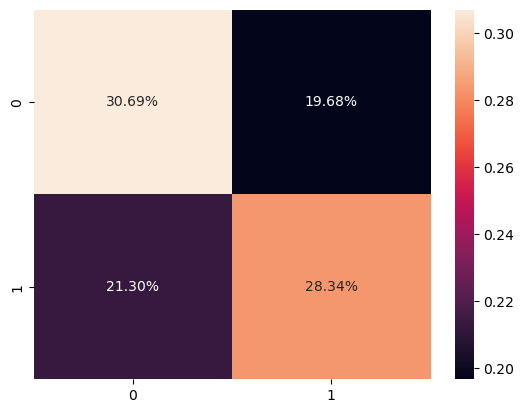

In [549]:
sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%')

<h1> Analise usando K-means (Previsão de qual time vence)

In [547]:
X = df.loc[:, ['blueWardsPlaced',	'blueWardsDestroyed',	'blueFirstBlood',	'blueKills',	'blueDeaths',	'blueAssists',	'blueEliteMonsters',	
               'blueDragons',	'blueHeralds',	    'blueTowersDestroyed',	'blueTotalGold',	'blueAvgLevel',	'blueTotalExperience',	'blueTotalMinionsKilled',	'blueTotalJungleMinionsKilled',	'blueGoldDiff',	'blueExperienceDiff',	'blueCSPerMin',	'blueGoldPerMin',
               'redWardsPlaced',	'redWardsDestroyed',	'redFirstBlood',	'redKills',	'redDeaths',	'redAssists',	'redEliteMonsters',	'redDragons',	'redHeralds',	'redTowersDestroyed',	'redTotalGold',	'redAvgLevel',	'redTotalExperience',	'redTotalMinionsKilled',	'redTotalJungleMinionsKilled',	'redGoldDiff',	'redExperienceDiff',	'redCSPerMin',	'redGoldPerMin'] ].values 


y = df['blueWins'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4.519158,0,2.80,0.7,1,0.9,0.6,1.1,0,0,...,0,1.6567,0.68,1.7047,1.97,0.55,-0.643,0.800,1.97,1.6567
1,4.523372,0,1.20,0.6,0,0.7,1.1,0.6,0,0,...,1,1.7620,0.68,1.7438,2.40,0.52,2.908,1.173,2.40,1.7620
2,4.521475,0,1.50,0.6,0,0.6,0.6,0.6,1,1,...,0,1.7285,0.68,1.7254,2.03,2.80,1.172,1.033,2.03,1.7285
3,4.524384,0,4.30,1.3,0,0.7,0.6,0.7,1,0,...,0,1.6478,0.70,1.7961,2.35,4.70,1.321,0.700,2.35,1.6478
4,4.436034,0,0.75,0.6,0,0.7,1.3,0.8,0,0,...,0,1.7404,0.70,1.8313,2.25,0.67,1.004,-2.300,2.25,1.7404


In [559]:
rdf = KMeans(n_clusters=2, random_state=0, n_init=20)
rdf.fit(X_train, y_train)

centroids = rdf.cluster_centers_
with np.printoptions(precision=3):
    print(centroids)

[[ 1.808e+00  2.677e+00  5.090e-01  3.254e+00  3.217e+00  3.539e+00
   5.558e-01  3.655e-01  1.903e-01  5.158e-02  1.651e+00  6.933e-01
   1.793e+00  2.165e+00  2.354e+00 -8.468e-01 -1.210e+00  2.165e+00
   1.651e+00  1.810e+00  2.601e+00  4.910e-01  3.217e+00  3.254e+00
   3.489e+00  5.724e-01  4.121e-01  1.603e-01  4.469e-02  1.649e+00
   6.953e-01  1.797e+00  2.175e+00  2.234e+00  8.468e-01  1.210e+00
   2.175e+00  1.649e+00]
 [ 2.700e+00  2.667e+00  1.000e+00  6.333e+00  2.667e+00  4.000e+00
   6.667e-01  3.333e-01  3.333e-01  6.939e-18  1.729e+00  7.067e-01
   1.931e+00  2.280e+00  2.613e+01  2.576e+03  2.203e+03  2.280e+00
   1.729e+00  2.600e+00  1.667e+00  0.000e+00  2.667e+00  6.333e+00
   4.333e+00  3.333e-01  3.333e-01  0.000e+00  0.000e+00  1.471e+00
   6.867e-01  1.711e+00  2.113e+00  2.013e+00 -2.576e+03 -2.203e+03
   2.113e+00  1.471e+00]]


In [ ]:
y_pred = rdf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", "{:0.5f}".format(accuracy))
print("Precision:", "{:0.5f}".format(precision))
print("Recall:", "{:0.5f}".format(recall))

Accuracy: 0.50445
Precision: 1.00000
Recall: 0.00163
